<b><h2 style="text-align:center;">COMM493 - Coding AI for Business</h2><b>

<h5 style="text-align:center;">Assignment 1 - Linear Learner Data Identification & Preparation</h5>

<h5 style="text-align:center;">Maxwell Brookes - 20244724</h5>

<h5 style="text-align:center;">Due on Feb 9</h5>


<b><h4>About The Dataset:</h4><b>
<h5>asdjklasj klasjkl fjaklsdjfklsjadklf jalskfjklsd j fasdklj fklasjdf ljaslfjsdlfj kadj</h5>


<b><h4>Load Modules & Tools:</h4><b>

In [1]:
import numpy as np  # for linear algebra
import pandas as pd  # for loading data
import seaborn as sns  # for heatmap
import matplotlib.pyplot as plt  # for visualizations
import sys  # for system information
from sklearn.model_selection import train_test_split  # for splitting dataset

target_column = 'is_canceled'

print(sys.version)
print("Successfully Loaded All Modules")

3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:16:10) [GCC 13.3.0]
Successfully Loaded All Modules



<b><h4>Load Dataset:</h4><b>

In [2]:
# dataset = https://www.kaggle.com/datasets/smac91/hotel-bookings, implementation = https://www.kaggle.com/datasets/somnathnaskar/hotel-booking-dataset/data
df = pd.read_csv('hotel_bookings.csv')  # Load the CSV file into a DataFrame


<b><h4>Preview Dataset:</h4><b>

In [3]:
print('Data Shape:', df.shape)  # print the shape of the data
print('Data Preview:')
print(df.iloc[:10, :5].to_string(index=False))  # list first 10 row and columns

Data Shape: (119390, 32)
Data Preview:
       hotel  is_canceled  lead_time  arrival_date_year arrival_date_month
Resort Hotel            0        342               2015               July
Resort Hotel            0        737               2015               July
Resort Hotel            0          7               2015               July
Resort Hotel            0         13               2015               July
Resort Hotel            0         14               2015               July
Resort Hotel            0         14               2015               July
Resort Hotel            0          0               2015               July
Resort Hotel            0          9               2015               July
Resort Hotel            1         85               2015               July
Resort Hotel            1         75               2015               July



<b><h4>Drop Columns:</h4><b>
<h5>'agent' and 'company' because it doe snot matter in this context</h5>
<h5>'arrival_date_week_number' because 'arrival_date_month' and 'arrival_date_day_of_month' are already included</h5>
<h5>'country' because analysis is not based on location</h5>
<h5>'market_segment' because the values don't provide significant insight</h5>
<h5>'distribution_channel' because it has overlap with 'market_segment'</h5>
<h5>'days_in_waiting_list' because most values are zero</h5>
<h5>'meal' because most values are BB, which implies that all hotels offer the same</h5>
<h5>'reservation_status_date' because the info is already captured with 'lead_time'</h5>
<h5>'reservation_status' conveys the same information as 'is_cancelled'</h5>
<h5>'reserved_room_type' and 'assigned_room_type' because a small kingston business will not have many room options</h5>h5

In [4]:
# print(df.columns)  # Check available columns
# unique_dict = {col: df[col].unique() for col in df.columns}
# for col, uniques in unique_dict.items():
#     print(f"{col}: {uniques}")
columns_to_drop = ['agent', 'company', 'arrival_date_week_number',
                   'country', 'market_segment', 'distribution_channel',
                   'days_in_waiting_list', 'meal', 'reservation_status',
                  'reserved_room_type', 'assigned_room_type'] # maybe add is_repeated_guest 
df.drop(columns_to_drop, axis=1, inplace=True)  # drop columns without having to create a new pandas data frame
print('Data Shape:', df.shape)

Data Shape: (119390, 21)



<b><h4>Further Cleaning (Rows, Unrealistic, Outliers, ...):</h4><b>

In [5]:
df.drop_duplicates(keep='first', inplace=True)  # Drop duplicate rows, keeping only the first occurrence
df['children'].fillna(0, inplace=True)  # Replace NaN values in 'children' with 0

df.drop(df[df['hotel'] == 'Resort Hotel'].index, inplace=True)  # Drop all rows where 'hotel' is 'Resort Hotel'
df.drop(['hotel'], axis=1, inplace=True)  # Drop the 'hotel' column since only 'City Hotel' remains

df.drop(df[df['adults'] == 0].index, inplace=True)  # Drop rows where 'adults' is 0
df.drop(df[df['adults'] > 15].index, inplace=True)  # Drop rows where 'adults' is greater than 15
df.drop(df[(df['children'] > 3) | (df['babies'] > 2)].index, inplace=True)  # Drop rows where 'children' > 3 or 'babies' > 2

df.drop(df[df['lead_time'] > 500].index, inplace=True)  # Drop rows where 'lead_time' is greater than 500
df.drop(df[(df['stays_in_week_nights'] > 30) | (df['stays_in_weekend_nights'] > 10)].index, inplace=True)  # Drop rows where 'stays_in_week_nights' > 30 or 'stays_in_weekend_nights' > 10

assert (df.isnull().values.any() == False)  # make sure that there are no null values

df.reset_index(drop=True, inplace=True)  # Reset the indicies after all modifications

print('Data Shape:', df.shape)  # print the shape of the data
print('Data Preview:')
print(df.iloc[:10, :5].to_string(index=False))  # list first 10 row and columns

Data Shape: (50804, 20)
Data Preview:
 is_canceled  lead_time  arrival_date_year arrival_date_month  arrival_date_day_of_month
           0          6               2015               July                          1
           1         88               2015               July                          1
           1         65               2015               July                          1
           1         92               2015               July                          1
           1        100               2015               July                          2
           1         79               2015               July                          2
           0          3               2015               July                          2
           1         63               2015               July                          2
           1         62               2015               July                          2
           0         43               2015               July           


<b><h4>Correlation Analysis:</h4><b>
<h5>Unfortuantely no valriables have a strong correlations with 'is_canceled'</h5>
<h5>Target business will have to collect more data as a part of this venture</h5>

Correlations With 'is_canceled'
is_canceled                       1.000000
lead_time                         0.203094
stays_in_week_nights              0.112225
adr                               0.079416
adults                            0.074784
arrival_date_year                 0.071658
stays_in_weekend_nights           0.062506
previous_cancellations            0.036855
children                          0.027756
arrival_date_day_of_month         0.005598
babies                           -0.025674
previous_bookings_not_canceled   -0.051461
is_repeated_guest                -0.078220
booking_changes                  -0.090870
required_car_parking_spaces      -0.131632
total_of_special_requests        -0.178109
Name: is_canceled, dtype: float64


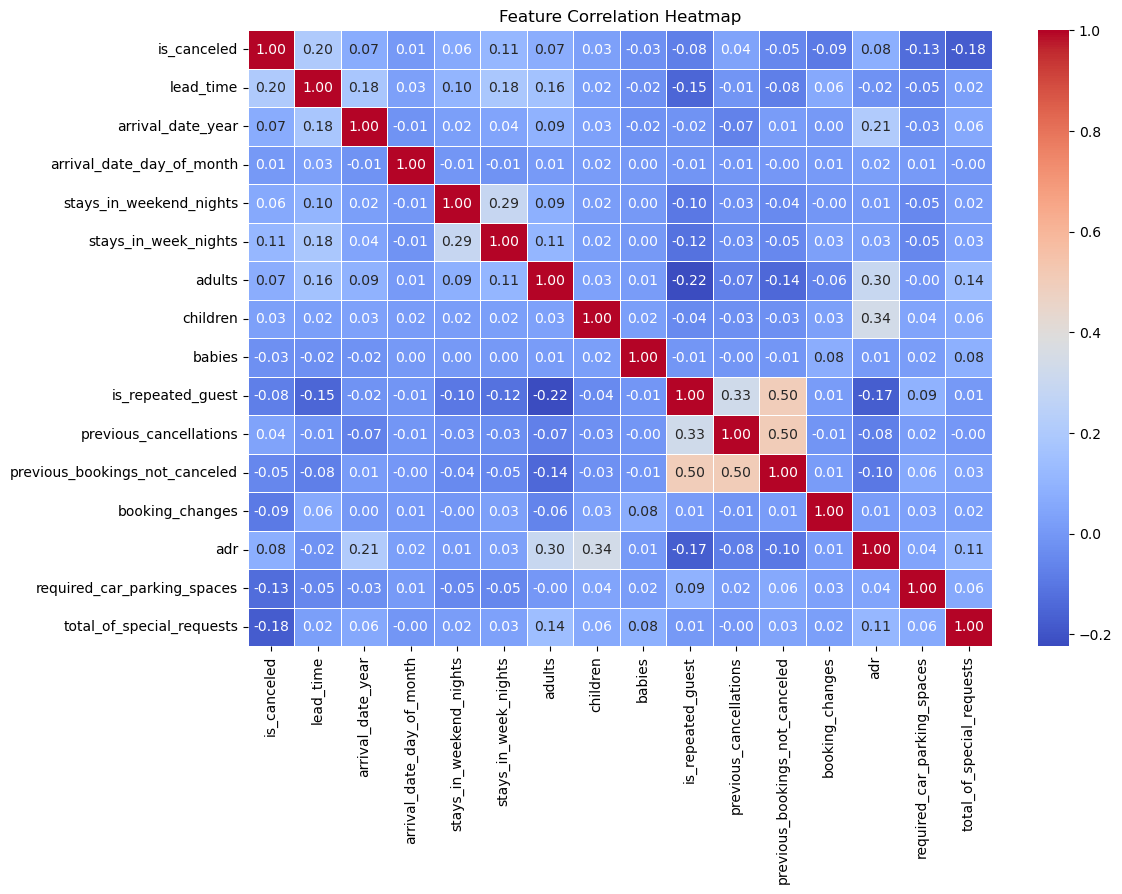

In [8]:
print('Correlations With \'is_canceled\'')
print(df.corr(numeric_only=True)[target_column].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
plt.close()


<b><h4>Split Data For Training and Evaluation:</h4><b>

In [9]:
x = df.drop(columns=[target_column])  # Features (independent variables)
y = df[target_column]  # Target variable (what we want to predict)

x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2, random_state=42)  # 80/20 split, random_state is fixed for reproducibility 

print(x_train.shape, x_eval.shape, y_train.shape, y_eval.shape)

(40643, 19) (10161, 19) (40643,) (10161,)
